In [8]:
# Import required libraries

import autograd.numpy as np
from autograd import grad # Used to automate calculation of the gradients of solution with respect to the current weights
import autograd.numpy.random as npr
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

Define ODE as:

$\dfrac{du}{dt}=\mathrm{sin}(40\,t\,u)$

with initial condition of:

$u(0)=1$

Common to use some form of automatic differentiation to process the backpropagation steps of network training. Popular library autograd has been superseded by 'jax'. Can't install jax on windows at the moment though, so stick with autograd.

In [24]:
def sigmoid(z): # Activation function
    return 1 / (1 + np.exp(-z))

def sigmoid_grad(z): # Gradient of the activation function
    return sigmoid(z) * (1 - sigmoid(z))

def neural_network(W, x): # This is a feedforward step
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, (W[0].T)**k), sigmoid_grad(x))

def f(x, y):
    return - np.sin(40*x*y) # right hand side of analytic equation

def loss_function(W, x):
    loss_sum = 0
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        y_t = 1 + xi*net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0] # Derivative
        d_y_t = net_out + xi*d_net_out
        func = f(xi, y_t)
        err_squ = (d_y_t - func)**2
        
        loss_sum += err_squ
    return loss_sum

In [34]:
nx = 101
dx = 0 #1. / nx

x_space = np.linspace(0, 1, nx) # Grid limits


In [35]:
W = [npr.randn(1,10), npr.randn(10,1)] # Randomly initialise the weights - this is where it's decided that there'll be 10 hidden nodes?
lamda = 0.001 # Gradient descent learning rate

for i in range(1000): # This is just gradient descent using the automated gradient calculator from autograd
    loss_grad = grad(loss_function)(W, x_space)
    
    W[0] = W[0] - lamda*loss_grad[0]
    W[1] = W[1] - lamda*loss_grad[1]

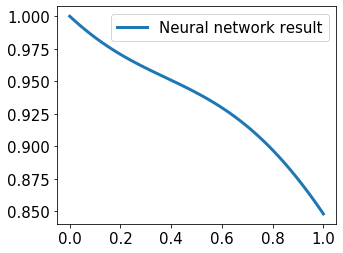

In [36]:
result = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space]

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x_space, result, linewidth=3, label='Neural network result')
plt.legend()
plt.show()

In [32]:
len(result)

12